# 1. Perkenalan

- Nama Group : RepiuBoss
- Batch : 015
- Dataset : Review Tokopedia (https://www.kaggle.com/datasets/farhan999/tokopedia-product-reviews)
- Objectives : Collecting product or services comment reviews, clustering the isues from reviews, and sorting the data into easy readable summary.

# 2. Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd

# Exploratory Dataset

import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Text Preprocessing

import re
import string
from nltk.tokenize import word_tokenize
import nltk.stem as stemmer
from nltk.stem.porter import *

# Metrics and Validation

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Embedding Layer

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, TextVectorization, GlobalAveragePooling1D, Input, LSTM, GRU, Dropout, Dense

from urllib import request
from PIL import Image

In [2]:
# Download Stopwords and Punkt

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stevenkusuma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/stevenkusuma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 3. Data Loading

In [3]:
# Load Dataset

data = pd.read_csv('train.csv')
data

,id,header_review,review_sangat_singkat,label
0,0,Mantap Barang Sesuai Pesanan,mantap barang sesuai pesanan,1
1,1,Mantaps.....,Mantaps.....,1
2,2,Barang Sesuai,Terima kasih buka lapaklapak barang sesuai den...,1
3,3,Barang Asli,Barang asli,1
4,4,Mmc 32 Gb. Samsung,Packing rapih barang sesuai pesanan dan ce...,1
...,...,...,...,...
96324,96324,Sesuai Pesanan,"sudah sampai, blm dicoba,semoga bermanfaat",1
96325,96325,Biasa Saja,barangnya sesuai dengan harganya thanks sda di...,1
96326,96326,Okeexxxxxxxxxxxxxxx,okeexxxxkkkkkkkkkkkkkkkkkkssss,1
96327,96327,Barang Cepat Sampai Dan Bagus. Makasih Yaa...,Respon nya bagus ramah. Barang cpt sampai. Mak...,1


In [4]:
kamus_2 = pd.read_csv('kamus_2.txt', sep="	", header=None,names=['slang', 'fix'])

In [5]:
kamus_2.tail()

,slang,fix
1314,istaa,nista
1315,benarjujur,benar
1316,benarjujur,jujur
1317,sayan,sayang
1318,mgkin,mungkin


In [6]:
kamus_2.drop(index=147, inplace=True)

In [7]:
kamus = kamus_2.append({'slang':'brg', 'fix':'barang'}, ignore_index=True)
kamus = kamus.append({'slang':'nggk', 'fix':'tidak'}, ignore_index=True)
kamus = kamus.append({'slang':'thankss', 'fix':'terima kasih'}, ignore_index=True)

/var/folders/hd/ljl6m4756zjf08kq1pmpvk680000gn/T/ipykernel_6481/1821775587.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kamus = kamus_2.append({'slang':'brg', 'fix':'barang'}, ignore_index=True)
/var/folders/hd/ljl6m4756zjf08kq1pmpvk680000gn/T/ipykernel_6481/1821775587.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kamus = kamus.append({'slang':'nggk', 'fix':'tidak'}, ignore_index=True)
/var/folders/hd/ljl6m4756zjf08kq1pmpvk680000gn/T/ipykernel_6481/1821775587.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kamus = kamus.append({'slang':'thankss', 'fix':'terima kasih'}, ignore_index=True)


In [8]:
slang_list = kamus['slang'].tolist()
fix_list = kamus['fix'].tolist()

In [9]:
kamus.tail()

,slang,fix
1316,sayan,sayang
1317,mgkin,mungkin
1318,brg,barang
1319,nggk,tidak
1320,thankss,terima kasih


In [10]:
data.head()

,id,header_review,review_sangat_singkat,label
0,0,Mantap Barang Sesuai Pesanan,mantap barang sesuai pesanan,1
1,1,Mantaps.....,Mantaps.....,1
2,2,Barang Sesuai,Terima kasih buka lapaklapak barang sesuai den...,1
3,3,Barang Asli,Barang asli,1
4,4,Mmc 32 Gb. Samsung,Packing rapih barang sesuai pesanan dan ce...,1


In [11]:
data.tail()

,id,header_review,review_sangat_singkat,label
96324,96324,Sesuai Pesanan,"sudah sampai, blm dicoba,semoga bermanfaat",1
96325,96325,Biasa Saja,barangnya sesuai dengan harganya thanks sda di...,1
96326,96326,Okeexxxxxxxxxxxxxxx,okeexxxxkkkkkkkkkkkkkkkkkkssss,1
96327,96327,Barang Cepat Sampai Dan Bagus. Makasih Yaa...,Respon nya bagus ramah. Barang cpt sampai. Mak...,1
96328,96328,Siiip.,"Sesuai pesanan, mantap. . Recomended seller.",1


In [12]:
# Check Dataset - 1

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96329 entries, 0 to 96328
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     96329 non-null  int64 
 1   header_review          96322 non-null  object
 2   review_sangat_singkat  96329 non-null  object
 3   label                  96329 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.9+ MB


<AxesSubplot:ylabel='label'>

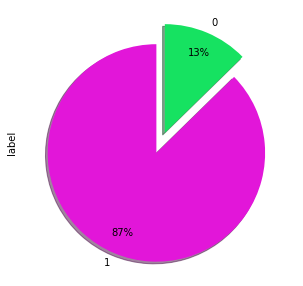

In [40]:
# Create Pie Chart to know rating distribution

data['label'].value_counts().plot(kind='pie', autopct='%1.0f%%',
                                  shadow=True,
                                  startangle=90,
                                  pctdistance=0.8,
                                  explode= (0.1,0.1),
                                  colors=['#e216d9', '#16e261'],
                                  figsize=(5,5))

# 4. Data Preprocessing

## 4.1. Get Data for Model Inference

In [13]:
# Get Data for model Inference

data_inf = data.sample(10, random_state=25)
data_inf

,id,header_review,review_sangat_singkat,label
35167,35167,Salah Warna,Ane pesenya warna item pink yang dateng malah ...,1
91987,91987,Kecewa,"Kecewa, barangnya jelek banget. Bahannya jelek...",0
29651,29651,Puas,Barangnya cepat sekali di prosesnya,1
30502,30502,10k,Mantap dari puluhan ribu cuma 10k aja mantul l...,1
58550,58550,Wanginya Oke Bgt,"dapat yg masih bagus, wanginya juga original.",1
21794,21794,Biasa Aja Bahannya,gak da yang istimewa. maklum tas buatan lokal ...,1
31637,31637,Good,good,1
81191,81191,Mantap,mantap,1
9801,9801,Bagus,bagus,1
35784,35784,Toko Terbaik,"Saya pembeli Dari Riau, saat Saya terima baran...",1


In [14]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,id,header_review,review_sangat_singkat,label
0,0,Mantap Barang Sesuai Pesanan,mantap barang sesuai pesanan,1
1,1,Mantaps.....,Mantaps.....,1
2,2,Barang Sesuai,Terima kasih buka lapaklapak barang sesuai den...,1
3,3,Barang Asli,Barang asli,1
4,4,Mmc 32 Gb. Samsung,Packing rapih barang sesuai pesanan dan ce...,1
...,...,...,...,...
96324,96324,Sesuai Pesanan,"sudah sampai, blm dicoba,semoga bermanfaat",1
96325,96325,Biasa Saja,barangnya sesuai dengan harganya thanks sda di...,1
96326,96326,Okeexxxxxxxxxxxxxxx,okeexxxxkkkkkkkkkkkkkkkkkkssss,1
96327,96327,Barang Cepat Sampai Dan Bagus. Makasih Yaa...,Respon nya bagus ramah. Barang cpt sampai. Mak...,1


In [15]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,id,header_review,review_sangat_singkat,label
0,35167,Salah Warna,Ane pesenya warna item pink yang dateng malah ...,1
1,91987,Kecewa,"Kecewa, barangnya jelek banget. Bahannya jelek...",0
2,29651,Puas,Barangnya cepat sekali di prosesnya,1
3,30502,10k,Mantap dari puluhan ribu cuma 10k aja mantul l...,1
4,58550,Wanginya Oke Bgt,"dapat yg masih bagus, wanginya juga original.",1
5,21794,Biasa Aja Bahannya,gak da yang istimewa. maklum tas buatan lokal ...,1
6,31637,Good,good,1
7,81191,Mantap,mantap,1
8,9801,Bagus,bagus,1
9,35784,Toko Terbaik,"Saya pembeli Dari Riau, saat Saya terima baran...",1


## 4.2. Text to Lowercase, Removing Punctuations, Removing Other Non Needed Texts, Removing Stopwords

In [16]:
# A Function to use in the dataframe

def text_process(text):

  # 1. Change all text to Lowercase
  text = text.lower()
  
  # 2. Removing Mentions
  text = re.sub("@[A-Za-z0-9_]+", " ", text)
  
  # 3. Removing Hashtags
  text = re.sub("#[A-Za-z0-9_]+", " ", text)
  
  # 4. Removing \n
  text = re.sub(r"\n", " ",text)
  
  # 5. Removing Whitespaces
  text = text.strip()

  # 6. Removing Links
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)

  # 7. Removing non text characters such as Emojis, Mathematical symbols
  text = re.sub("[^A-Za-z\s']", " ", text)

  # 8. Removing RT
  text = re.sub("rt", " ",text)

  # 9. Removing Punctuations
  text = text.translate(str.maketrans('', '', string.punctuation))

  # 10. Tokenization
  tokens = word_tokenize(text)
  
  for x in range(len(tokens)):
    for i in range(len(slang_list)):
      if tokens[x] == slang_list[i]:
        tokens[x] = fix_list[i]
      else:
        pass
  
  return text

In [19]:
# Applying Preprocessing to all Documents

data_train_test['text_processed'] = data_train_test['review_sangat_singkat'].apply(lambda x: text_process(x))
data_train_test

,id,header_review,review_sangat_singkat,label,text_processed
0,0,Mantap Barang Sesuai Pesanan,mantap barang sesuai pesanan,1,mantap barang sesuai pesanan
1,1,Mantaps.....,Mantaps.....,1,mantaps
2,2,Barang Sesuai,Terima kasih buka lapaklapak barang sesuai den...,1,terima kasih buka lapaklapak barang sesuai den...
3,3,Barang Asli,Barang asli,1,barang asli
4,4,Mmc 32 Gb. Samsung,Packing rapih barang sesuai pesanan dan ce...,1,packing rapih barang sesuai pesanan dan ce...
...,...,...,...,...,...
96314,96324,Sesuai Pesanan,"sudah sampai, blm dicoba,semoga bermanfaat",1,sudah sampai blm dicoba semoga bermanfaat
96315,96325,Biasa Saja,barangnya sesuai dengan harganya thanks sda di...,1,barangnya sesuai dengan harganya thanks sda di...
96316,96326,Okeexxxxxxxxxxxxxxx,okeexxxxkkkkkkkkkkkkkkkkkkssss,1,okeexxxxkkkkkkkkkkkkkkkkkkssss
96317,96327,Barang Cepat Sampai Dan Bagus. Makasih Yaa...,Respon nya bagus ramah. Barang cpt sampai. Mak...,1,respon nya bagus ramah barang cpt sampai mak...


## 4.3. Splitting between `X` (Corpus) and `y` (Target)

In [20]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(data_train_test.text_processed, 
                                                            data_train_test.label, 
                                                            test_size=0.15,
                                                            random_state=25,
                                                            stratify=data_train_test.label)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=25)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (69590,)
Val Size :  (12281,)
Test Size :  (14448,)


## 4.4. Handling Missing Values

In [21]:
# Check Missing Values on X_train

X_train.isnull().sum()

0

In [22]:
# Check Missing Values on X_val

X_val.isnull().sum()

0

In [23]:
# Check Missing Values on X_test

X_test.isnull().sum()

0

In [24]:
# Check Missing Values on y_train

y_train.isnull().sum()

0

In [25]:
# Check Missing Values on y_val

y_val.isnull().sum()

0

In [26]:
# Check Missing Values on y_test

y_test.isnull().sum()

0

## 4.5. Pipeline

In [27]:
# Convert String into Numerical Vocabularies

count_vect = CountVectorizer()

X_train_vect = count_vect.fit_transform(X_train)
X_val_vect = count_vect.transform(X_val)
X_test_vect = count_vect.transform(X_test)

In [28]:
# Search for Total Vocab and Maximum Token in One Document

total_vocab = len(count_vect.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Total Vocab : ", total_vocab)
print("Maximum Sentence Length : ", max_sen_len, "word")

Total Vocab :  26260
Maximum Sentence Length :  343 word


In [29]:
# Text Vectorization (For Layer 1)

text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)
                                       )

text_vectorization.adapt(X_train)

2022-10-25 15:43:46.383134: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [30]:
# Embedding

embedding = Embedding(input_dim=total_vocab,
                      output_dim=172,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

In [31]:
# Tensor Pipeline Train Set
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=150).batch(64)

# Tensor Pipeline Test Set
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(64)

# Tensor Pipeline Validation Set
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(64)

# `Sequential API`

# 6. Model Definition

In [32]:
# Create Sequential API
model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(GlobalAveragePooling1D())

# Hidden Layer 1
model.add(Dense(32,activation='relu'))

# Output Layer
model.add(Dense(1,activation='sigmoid'))

# Compiling
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 343)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 343, 172)          4516720   
                                                                 
 global_average_pooling1d (G  (None, 172)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                5536      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,522,289
Trainable params: 4,522,289
Non-

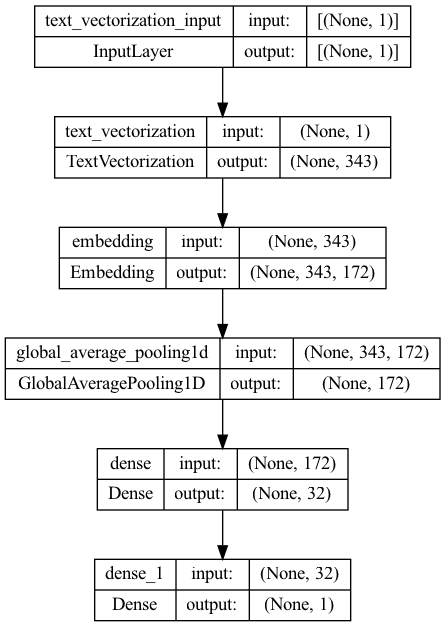

In [33]:
# Plot Layers

tf.keras.utils.plot_model(model, show_shapes=True)

# 7. Model Training

In [34]:
# Train the Model

history_1 = model.fit(train_dataset, epochs=30, validation_data=val_dataset)

Epoch 1/30
1088/1088 [==============================] - 11s 10ms/step - loss: 0.3527 - accuracy: 0.8745 - val_loss: 0.2653 - val_accuracy: 0.8884
Epoch 2/30
1088/1088 [==============================] - 10s 9ms/step - loss: 0.2400 - accuracy: 0.9000 - val_loss: 0.2241 - val_accuracy: 0.9055
Epoch 3/30
1088/1088 [==============================] - 11s 10ms/step - loss: 0.2146 - accuracy: 0.9123 - val_loss: 0.2197 - val_accuracy: 0.9099
Epoch 4/30
1088/1088 [==============================] - 10s 10ms/step - loss: 0.2025 - accuracy: 0.9182 - val_loss: 0.2212 - val_accuracy: 0.9111
Epoch 5/30
1088/1088 [==============================] - 10s 9ms/step - loss: 0.1931 - accuracy: 0.9227 - val_loss: 0.2169 - val_accuracy: 0.9134
Epoch 6/30
1088/1088 [==============================] - 10s 10ms/step - loss: 0.1863 - accuracy: 0.9259 - val_loss: 0.2156 - val_accuracy: 0.9145
Epoch 7/30
1088/1088 [==============================] - 10s 10ms/step - loss: 0.1793 - accuracy: 0.9296 - val_loss: 0.2200 - v

# 8. Model Evaluation

In [35]:
# Create Dataframe

history_seq_df = pd.DataFrame(history_1.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.352701,0.874537,0.265309,0.888364
1,0.240048,0.900000,0.224075,0.905464
2,0.214569,0.912257,0.219664,0.909861
3,0.202492,0.918192,0.221185,0.911082
4,0.193083,0.922719,0.216924,0.913444
5,0.186296,0.925851,0.215600,0.914502
6,0.179306,0.929559,0.220038,0.912711
7,0.172576,0.933079,0.221939,0.912304
8,0.167057,0.935623,0.230744,0.911001
9,0.161007,0.938813,0.228282,0.912304


<AxesSubplot:>

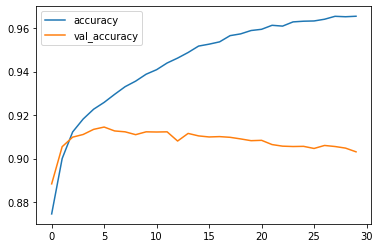

In [36]:
# Plot between Accuracy and val_accuracy

history_seq_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

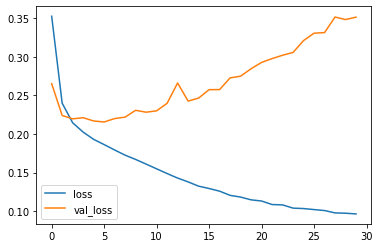

In [37]:
# Plot between loss and val_loss

history_seq_df[['loss', 'val_loss']].plot()

In [38]:
# Model Evaluation using Classification Report

y_pred_seq = model.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

452/452 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.68      0.37      0.48      1832
           1       0.91      0.98      0.94     12616

    accuracy                           0.90     14448
   macro avg       0.80      0.67      0.71     14448
weighted avg       0.88      0.90      0.88     14448



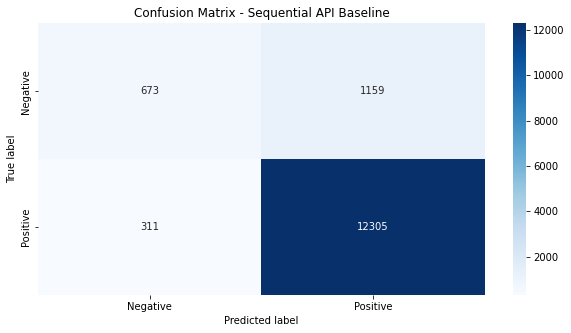

In [39]:
# Check Confusion Matrix

cm = confusion_matrix(y_test, y_pred_seq)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Negative', 'Positive'], 
            yticklabels = ['Negative', 'Positive'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Sequential API Baseline")
plt.show()

# `Sequential API - Model Improvement`

# 6. Model Definition

In [ ]:
# Create Sequential API
model_imp = Sequential()
model_imp.add(text_vectorization)
model_imp.add(embedding)
model_imp.add(GlobalAveragePooling1D())

# Hidden Layer 1
model_imp.add(Dense(32,activation='relu'))

# Output Layer
model_imp.add(Dense(1,activation='sigmoid'))

# Compiling
model_imp.compile(loss='binary_crossentropy',optimizer='Nadam',metrics='accuracy')

model_imp.summary()

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_imp, show_shapes=True)

# 7. Model Training

In [ ]:
# Train the Model

history_imp = model_imp.fit(train_dataset, epochs=30, validation_data=val_dataset)

# 8. Model Evaluation

In [ ]:
# Create Dataframe

history_imp_df = pd.DataFrame(history_imp.history)
history_imp_df

Di `Epoch` ke 11 model sudah mulai tidak menunjukkan kenaikan atau penurunan lagi pada `Accuracy` maupun `Loss` nya. Bisa dibilang model ini cukup bagus untuk digunakan karena accuracy score nya sekitar `98%`. Dimana `2%` miss akan tidak sangat berpengaruh di dalam prediksi.

Bisa dibilang menggunakan optimizer `Nadam` model ini lebih cepat belajar data train nya.

In [ ]:
# Plot between Accuracy and val_accuracy

history_imp_df[['accuracy', 'val_accuracy']].plot()

In [ ]:
# Plot between loss and val_loss

history_imp_df[['loss', 'val_loss']].plot()

Meskipun model ini fast learner, tapi accuracy nya `over-fit` dimana validation accuracy nya di bawah train accuracy nya.

In [ ]:
# Model Evaluation using Classification Report

y_pred_seq = model_imp.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

Highlight disini adalah Model mendapatkan :

- Accuracy Score = `98%`
- Serta di prediksi Non-Spam = `98%`
- Di prediksi Spam = `93%`

Menurun dari model pertama

In [ ]:
# Check Confusion Matrix

cm = confusion_matrix(y_test, y_pred_seq)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['No Spam', 'Spam'], 
            yticklabels = ['No Spam', 'Spam'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Sequential API Model Improvement")
plt.show()

Dari total :

- Non Spam = 131 total, ada 2 yang salah prediksi menjadi spam
- Spam = 30 total, ada 2 yang salah prediksi menjadi non-spam

Menurun dari model yang pertama, dimana salah prediksi true label non-spam hanya 1

# 9. Model Saving

In [ ]:
# Freeze Best Model

model.trainable = False

In [ ]:
# Best Model Summary

model.summary()

In [ ]:
model.save("spam_check_model")

In [ ]:
! zip -r spam_check_model.zip spam_check_model

# 10. Model Inference

In [ ]:
# Display Inference-Set 

data_inf

In [ ]:
# A Function to use in the dataframe

def text_process(text):

  # 1. Change all text to Lowercase
  text = text.lower()
  
  # 2. Removing Mentions
  text = re.sub("@[A-Za-z0-9_]+", " ", text)
  
  # 3. Removing Hashtags
  text = re.sub("#[A-Za-z0-9_]+", " ", text)
  
  # 4. Removing \n
  text = re.sub(r"\\n", " ",text)
  
  # 5. Removing Whitespaces
  text = text.strip()

  # 6. Removing Links
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)

  # 7. Removing non text characters such as Emojis, Mathematical symbols
  text = re.sub("[^A-Za-z\s']", " ", text)

  # 8. Removing RT
  text = re.sub("rt", " ",text)

  # 9. Tokenization
  tokens = word_tokenize(text)

  # 10. Removing Stopwords
  stopwords_en = list(set(stopwords.words('english')))
  text = ' '.join([word for word in tokens if word not in stopwords_en])
  
  # 11. Stemming
  stemmer = PorterStemmer()
  text = stemmer.stem(text)
  
  return text

In [ ]:
# Applying Preprocessing to all Documents

data_inf['Message_processed'] = data_inf['Message_body'].apply(lambda x: text_process(x))
data_inf

In [ ]:
data_inf_x = data_inf['Message_processed']

In [ ]:
# Predict using Best Model & Change if >= 0.5 to 1

y_pred_inf = model.predict(data_inf_x)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf

In [ ]:
# Create DataFrame of Label Prediction using Best Model

y_pred_inf_data = pd.DataFrame(y_pred_inf, columns=['Label_Prediction'])
y_pred_inf_data

In [ ]:
# Concate between Inference-Set and Label's Prediction Best Model

data_inf = pd.concat([data_inf, y_pred_inf_data], axis=1)
data_inf

Tidak ada salah prediksi dari keseluruhan sample.

# 11. Pengambilan Kesimpulan

Di jaman era teknologi sekarang, kebanyakan orang sudah mengirimkan promosi ataupun ads ataupun text melalui email. Namun ada beberapa yang spam email, dan sangat mengganggu inbox email. Model ini dibuat untuk mengklasifikasikan apakah email itu spam atau tidak, jadi kita tidak perlu menghabiskan waktu di email tersebut. Dan tidak terjerumus ke pishing email.

Dengan menggunakan model yang telah saya buat. Best modelnya yaitu Baseline Model, mendapatkan tingkat sebagai berikut :

- Accuracy Score : `98%`
- True Label 0 : `99%`
- True Label 1 : `95%`

dan di sample testing tidak ada salah prediksi dari keseluruhan meskipun kata-kata sudah dilakukan preprocessing, model dapat secara benar memprediksi label nya masing-masing.